In [3]:
pip install pandas numpy matplotlib seaborn yfinance plotly

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
df = pd.read_csv("C:/Users/SUDIPTO/Downloads/Starbucks_stock_history.csv")

In [33]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1992-06-26,0.270957,0.287086,0.264507,0.277409,224358400,0.0,0.0
1,1992-06-29,0.280635,0.303215,0.274183,0.296763,58732800,0.0,0.0
2,1992-06-30,0.303215,0.306440,0.283860,0.287086,34777600,0.0,0.0
3,1992-07-01,0.290312,0.296763,0.280635,0.293538,18316800,0.0,0.0
4,1992-07-02,0.296763,0.296763,0.287086,0.293538,13996800,0.0,0.0


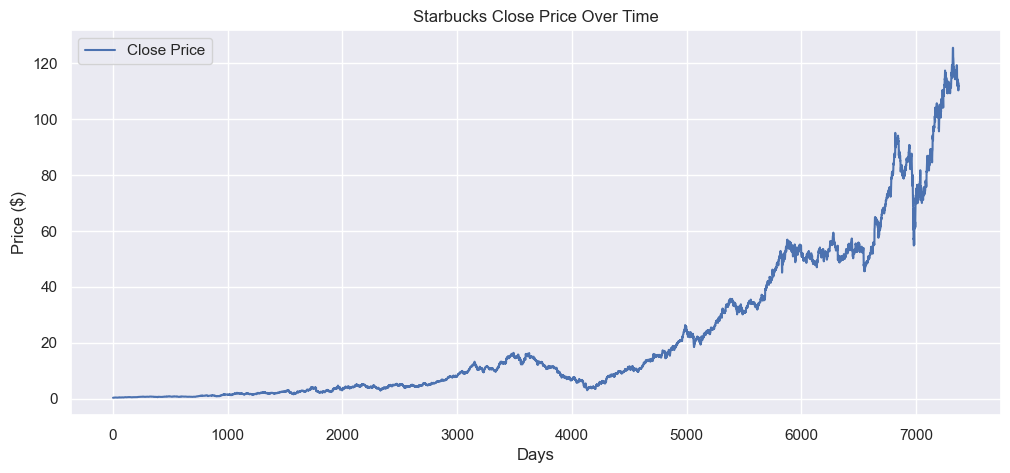

In [34]:
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price')
plt.title('Starbucks Close Price Over Time')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

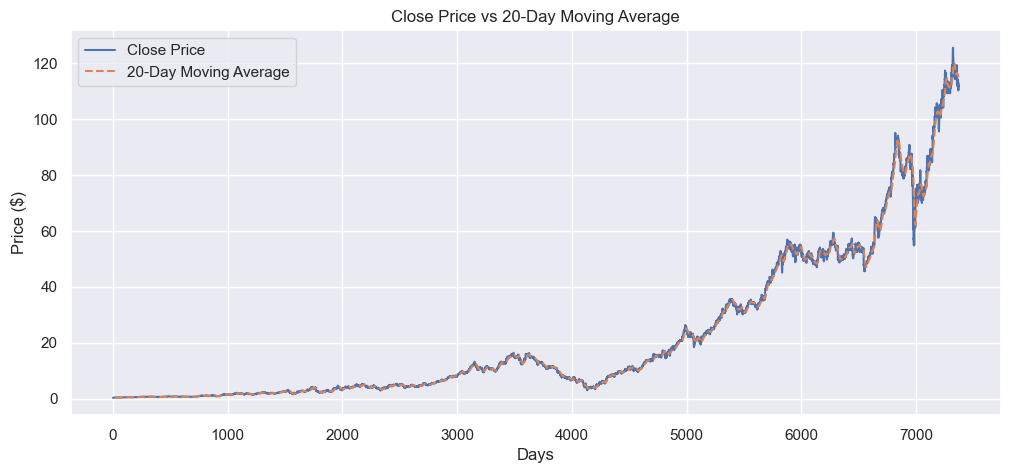

In [35]:
df['MA20'] = df['Close'].rolling(window=20).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day Moving Average', linestyle='--')
plt.title('Close Price vs 20-Day Moving Average')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


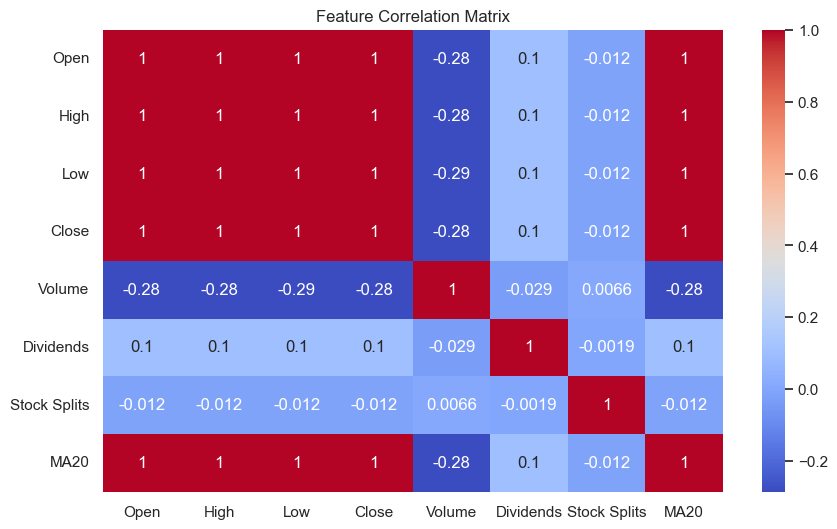

In [37]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [38]:
# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

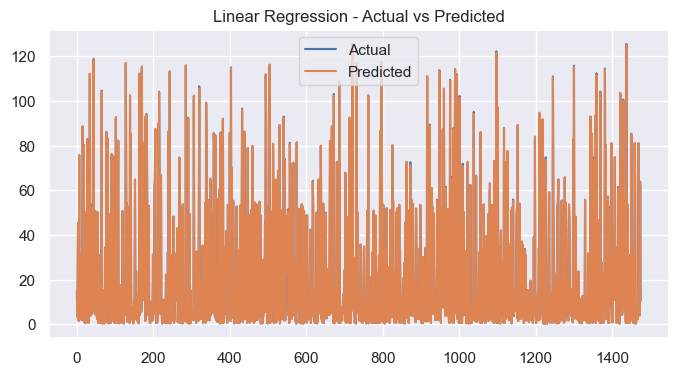

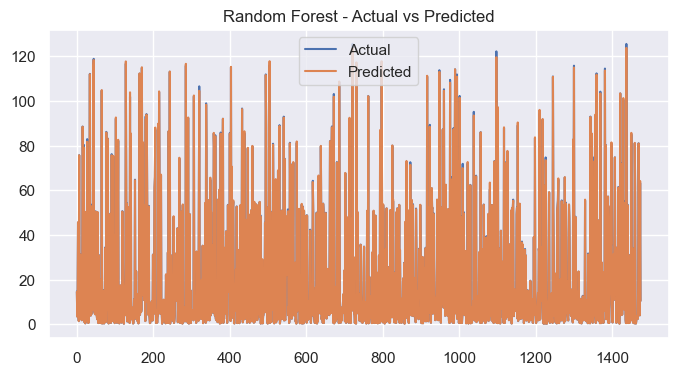

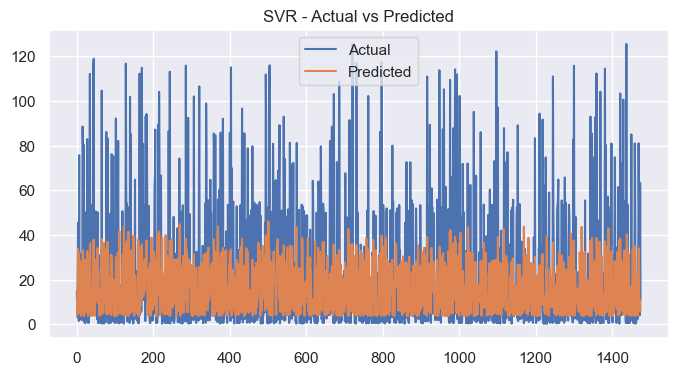

In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, predictions)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })
    
    # Plot predictions vs actual
    plt.figure(figsize=(8, 4))
    plt.plot(y_test.values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f'{name} - Actual vs Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

In [40]:
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,0.094700,0.036821,0.191887,0.999951
1,Random Forest,0.126919,0.082794,0.287739,0.999891
2,SVR,16.613248,626.270741,25.025402,0.173442
